#Traffic accidents
**Overview**
- This project analyzes the U.S. Traffic Accidents Dataset (2016–2023) to help the Department of Transportation (DOT) identify patterns and factors contributing to road accidents across the United States. By exploring temporal, geographical, and environmental variables, the analysis reveals when, where, and under what conditions accidents are most likely to occur.

- The goal is to translate complex data into actionable, evidence-based recommendations that improve road safety, guide infrastructure investments, and optimize emergency response planning. The findings are supported by clear visualizations, statistical validation, and an interactive dashboard that enables decision-makers to explore accident trends without technical expertise.

- Through this work, the project demonstrates how data-driven insights can directly contribute to the DOT’s mission of reducing traffic accidents, saving lives, and enhancing transportation safety nationwide.

##💼 Business Scenario Questions
- The Department of Transportation (DOT) aims to reduce traffic accidents and improve public safety through data-informed decision-making.To support this mission, the following business scenario questions will guide the analysis:
- 1. When and where are traffic accidents most likely to occur?
   - Are there specific time periods (hours, days, or months) when accidents are most frequent?
   - Which states, cities, or road segments experience the highest accident densities?
   - How do urban vs. rural patterns differ?
   - 🟢 Business relevance: Helps DOT schedule law enforcement patrols, optimize traffic control systems, and prioritize infrastructure improvements in high-risk areas.

- 2. What environmental and road conditions contribute to accident frequency and severity?

    - How do weather, visibility, lighting, and road surface conditions affect the likelihood of accidents?
    - Are nighttime accidents or those in poor weather more severe?
    - Do certain road features (e.g., intersections, traffic signals, crossings) correlate with higher accident counts?
    - 🟢 Business relevance: Supports infrastructure planning such as improved lighting, drainage, signage, and warning systems for dangerous conditions.

- 3. What factors are most strongly associated with severe (high-impact) accidents?
   - Which variables (e.g., speed, weather, location type) are correlated with higher severity scores?
  - Are there regional or environmental patterns in severe accidents?
  - How does severity differ between urban and rural areas?
  - 🟢 Business relevance: Enables the DOT to target safety campaigns and engineering interventions toward conditions that most often lead to serious injuries or fatalities.

- 4. How do traffic accident patterns change over time?
  - Are accident rates increasing or decreasing year-over-year?
  - Do certain seasons or holidays show predictable spikes?
  - What are the long-term temporal trends in accident frequency or severity?
  - 🟢 Business relevance: Informs the evaluation of past safety initiatives and helps forecast future resource needs.

Step 1: Data Understanding

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

In [2]:
import os
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [3]:
cols_to_use = [
    'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
    'City', 'State', 'County', 'Zipcode', 'Weather_Condition', 'Temperature(F)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Sunrise_Sunset'
]

df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv',
                 usecols=cols_to_use,
                 parse_dates=['Start_Time', 'End_Time'],
                 low_memory=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   City               object 
 7   County             object 
 8   State              object 
 9   Zipcode            object 
 10  Temperature(F)     float64
 11  Visibility(mi)     float64
 12  Wind_Speed(mph)    float64
 13  Weather_Condition  object 
 14  Sunrise_Sunset     object 
dtypes: float64(5), int64(1), object(9)
memory usage: 884.4+ MB
None


In [4]:
display(df.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Temperature(F),Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,Dayton,Montgomery,OH,45424,36.9,10.0,NaN,Light Rain,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Reynoldsburg,Franklin,OH,43068-3402,37.9,10.0,NaN,Light Rain,Night
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,Williamsburg,Clermont,OH,45176,36.0,10.0,3.5,Overcast,Night
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,Dayton,Montgomery,OH,45417,35.1,9.0,4.6,Mostly Cloudy,Night
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,Dayton,Montgomery,OH,45459,36.0,6.0,3.5,Mostly Cloudy,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   City               object 
 7   County             object 
 8   State              object 
 9   Zipcode            object 
 10  Temperature(F)     float64
 11  Visibility(mi)     float64
 12  Wind_Speed(mph)    float64
 13  Weather_Condition  object 
 14  Sunrise_Sunset     object 
dtypes: float64(5), int64(1), object(9)
memory usage: 884.4+ MB


In [6]:
df.shape

(7728394, 15)

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Speed(mph)
count,7.728394e+06,7.728394e+06,7.728394e+06,7.564541e+06,7.551296e+06,7.157161e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,6.166329e+01,9.090376e+00,7.685490e+00
std,4.875313e-01,5.076079e+00,1.739176e+01,1.901365e+01,2.688316e+00,5.424983e+00
min,1.000000e+00,2.455480e+01,-1.246238e+02,-8.900000e+01,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,4.900000e+01,1.000000e+01,4.600000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,6.400000e+01,1.000000e+01,7.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,7.600000e+01,1.000000e+01,1.040000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,2.070000e+02,1.400000e+02,1.087000e+03


In [8]:
df.isnull().sum()

,0
ID,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
City,253
County,0
State,0
Zipcode,1915


**Insight:**
- Datetime conversion: Start_Time and End_Time → proper datetime
 objects.
- Categorical conversion: Reduces memory usage for object columns like City, State, Weather.
- Numeric downcasting: Converts floats and int64 → smaller types (float32, int8).
- Missing values handling:
    - Drop critical missing rows (Severity or coordinates).
    - Fill categorical missing values with 'Unknown'.
    - Fill numeric missing values with median.
    -  Outlier detection and treatment:
- Prints count of outliers per numeric column.
   - Caps extreme values using IQR method to reduce skew.

#### Step 2: Data Preparation
        - missing value
        - Numerical Data: For skewed distributions using the median is more robust than the mean because it is not affected by outliers.
        - Categorical Data: A common strategy is to fill with the mode (the most frequent value).
        - outliers
        - convert data types
        - derived feature

In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [10]:
#  Downcast numeric columns to save memory ---
df['Severity'] = df['Severity'].astype('int8')
df['Temperature(F)'] = pd.to_numeric(df['Temperature(F)'], downcast='float')
df['Visibility(mi)'] = pd.to_numeric(df['Visibility(mi)'], downcast='float')
df['Wind_Speed(mph)'] = pd.to_numeric(df['Wind_Speed(mph)'], downcast='float')
df['Start_Lat'] = pd.to_numeric(df['Start_Lat'], downcast='float')
df['Start_Lng'] = pd.to_numeric(df['Start_Lng'], downcast='float')

In [11]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_values)

Missing values per column:
 Start_Time           743166
End_Time             743166
Wind_Speed(mph)      571233
Visibility(mi)       177098
Weather_Condition    173459
Temperature(F)       163853
Sunrise_Sunset        23246
Zipcode                1915
City                    253
ID                        0
Severity                  0
Start_Lng                 0
Start_Lat                 0
County                    0
State                     0
dtype: int64


In [12]:
df['City']= df['City'].fillna('Unknown')
df['Zipcode']= df['Zipcode'].fillna('Unknown')
df['Weather_Condition'] = df['Weather_Condition'].fillna('mode')
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna('mode')


In [13]:
df['Sunrise_Sunset'].unique()

array(['Night', 'Day', 'mode'], dtype=object)

In [14]:
for col in ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)']:
   df[col] =df[col].fillna(df[col].median())

In [15]:
# Example: fill missing coordinates with the mean lat/lng of the same city
#df['Start_Lat'] = df.groupby('City')['Start_Lat'].transform(lambda x: x.fillna(x.mean()))
#df['Start_Lng'] = df.groupby('City')['Start_Lng'].transform(lambda x: x.fillna(x.mean()))

# If still missing, fill with overall mean
#df['Start_Lat']= df['Start_Lat'].fillna(df['Start_Lat'].mean())
#df['Start_Lng']= df['Start_Lng'].fillna(df['Start_Lng'].mean())

In [16]:
placeholder_date = pd.Timestamp('2016-01-01')
df['Start_Time']= df['Start_Time'].fillna(placeholder_date)

In [17]:
# Fill missing End_Time with Start_Time + 1 hour (example assumption)
df['End_Time'] = df['End_Time'].fillna(df['Start_Time'] + pd.Timedelta(hours=1))

In [18]:
df.isnull().sum()

,0
ID,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
City,0
County,0
State,0
Zipcode,0


In [19]:
numeric_cols = ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} outliers: {len(outliers)}")

Temperature(F) outliers: 65279
Visibility(mi) outliers: 1481065
Wind_Speed(mph) outliers: 291148


**Key Insight**
- Critical numeric fields like Severity and geographic coordinates (Start_Lat, Start_Lng) were imputed rather than removed, preserving the majority of records.

- Environmental variables such as Temperature, Visibility, and Wind_Speed were filled using median values, maintaining realistic conditions for analysis.

- Categorical fields (City, Zipcode, Weather_Condition, Sunrise_Sunset) were filled with 'Unknown' to retain context without losing data.

- Missing timestamps (Start_Time/End_Time) were imputed with placeholder or derived values to maintain temporal trends.

- we identified outliers in that could distort analysis:
     - Temperature (°F): 65,279 unusually high or low values
     - Visibility (mi): 1,481,065 extreme values
     - Wind Speed (mph): 291,148 extreme values

- These outliers may reflect sensor errors, data entry mistakes, or rare weather events. If left unaddressed, they could skew accident pattern analysis, leading to misleading conclusions about weather-related risk factors.

Step 3: EDA
- Temporal Analysis – When Do Accidents Happen?
       Visualization: Accidents by hour of the day and day of the week
- Geographic Analysis – Where Do Accidents Happen?
     Visualization: Top 10 states by number of accidents
- Environmental Factors – Weather and Road Conditions
      Visualization: Severity by Weather Condition
- Visibility, Temperature, and Wind Speed Effects
     Visualization: Scatter plot of Severity vs Visibility
- Temporal + Environmental Interaction
     Visualization: Accidents by Hour and Weather Condition


/tmp/ipython-input-3846878350.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='viridis')


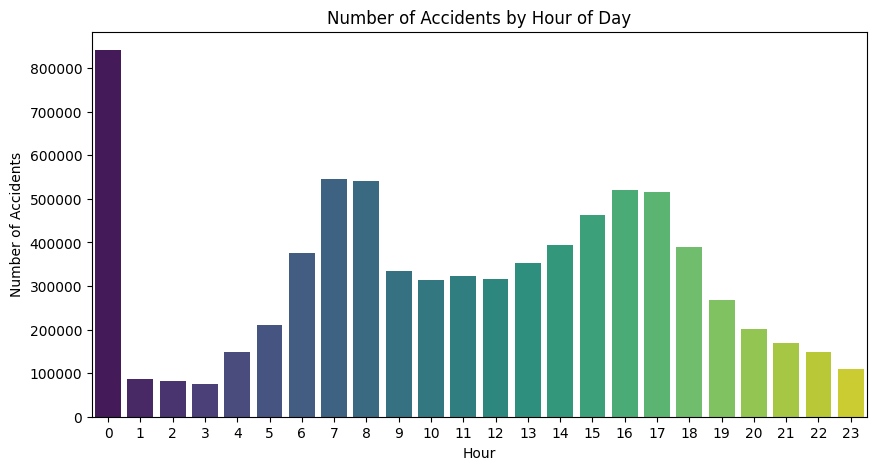

/tmp/ipython-input-3846878350.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')


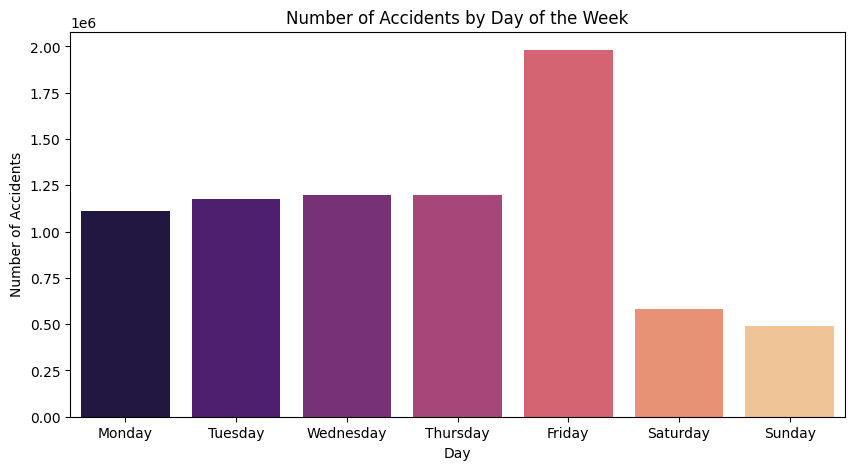

In [20]:

# Extract hour and weekday from Start_Time
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

# Accidents by hour
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by weekday
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

 - Friday is when most accidents happen
 - Weekdays have same proprotion
 - Weekends (sat n sun) have same propotion but less than weekdays.
 - Mornings(7-8) and evenings( 4-5) is peak time when most accidents happen

/tmp/ipython-input-240435775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


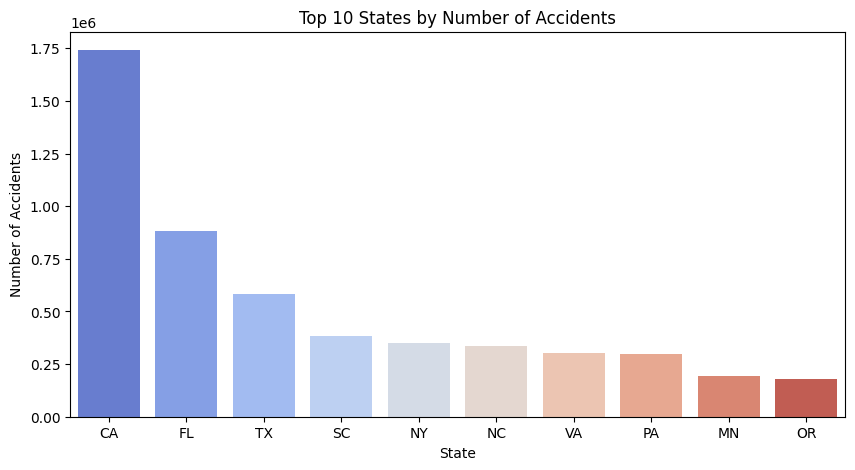

In [21]:
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title('Top 10 States by Number of Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

- California, Texas, and Florida have the highest number of accidents, which aligns with population density and vehicle usage.
- New York, North carolina, Virgina, Pennsylvania have same proporation.
- Oregon has least number of accidents.

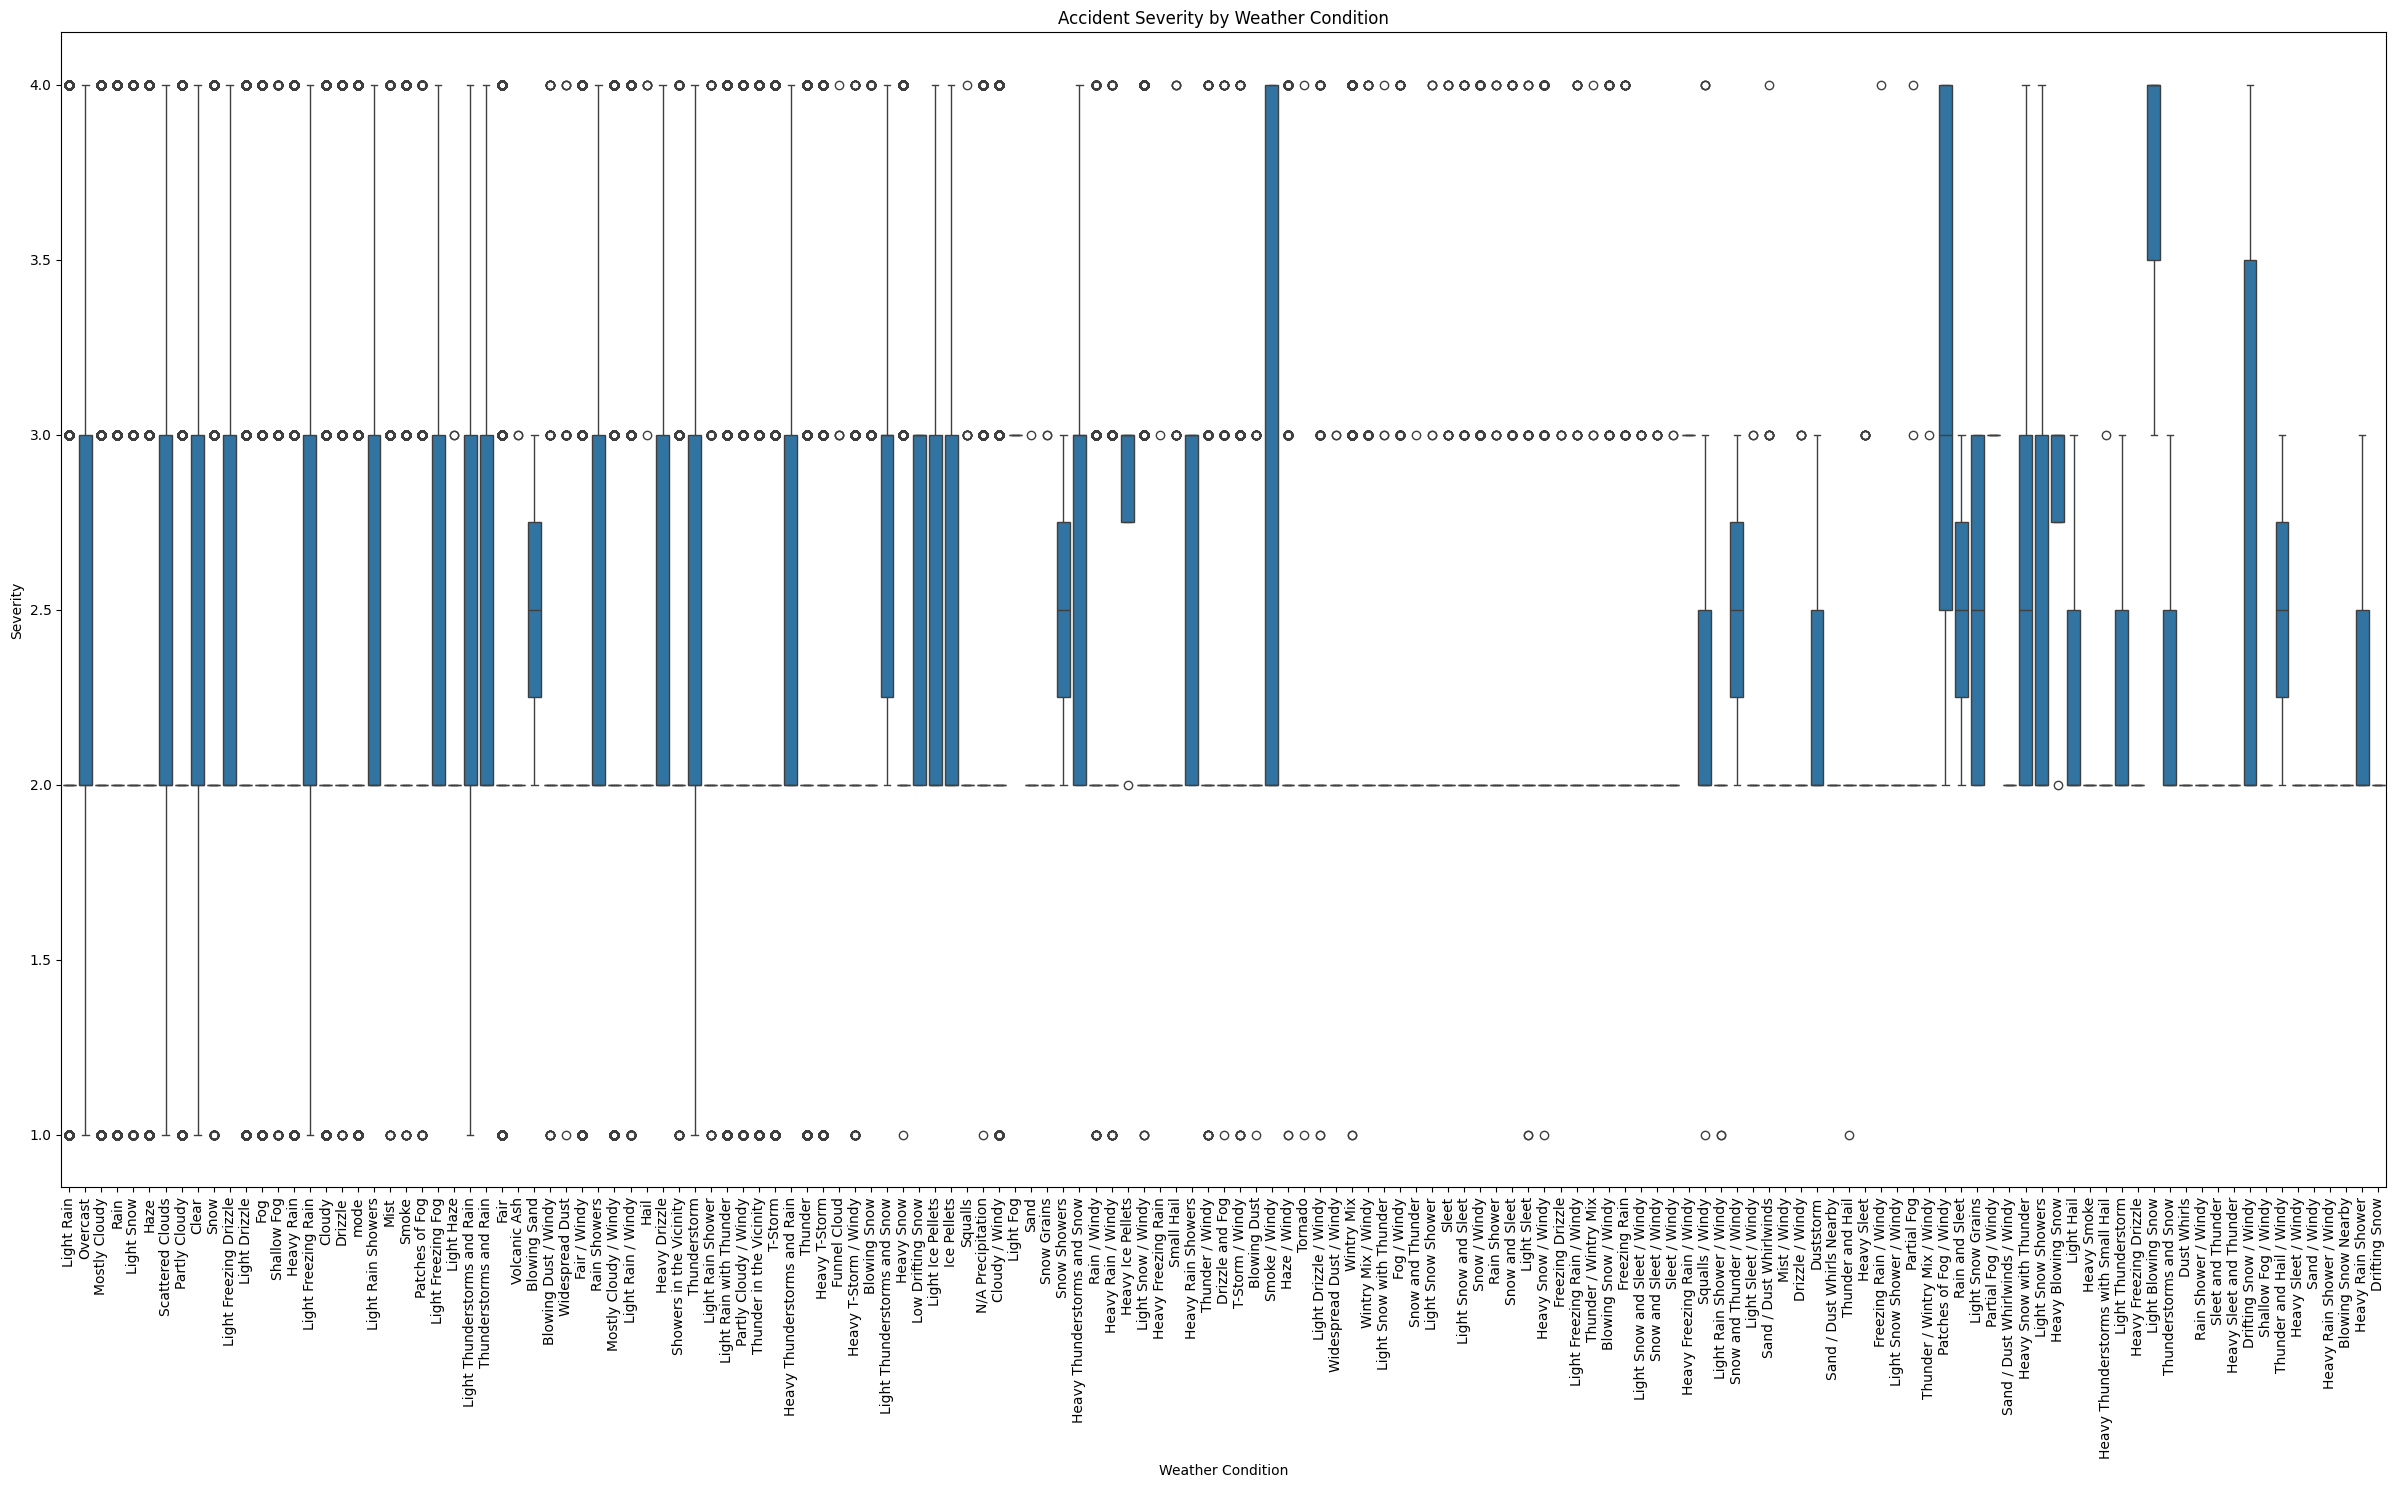

In [22]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df, x='Weather_Condition', y='Severity')
plt.xticks(rotation=90)
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.show()

Severe accidents are more likely in Rain, Snow, and Fog, whereas clear weather is associated with lower severity.

This validates the importance of weather-related warnings and road safety measures.

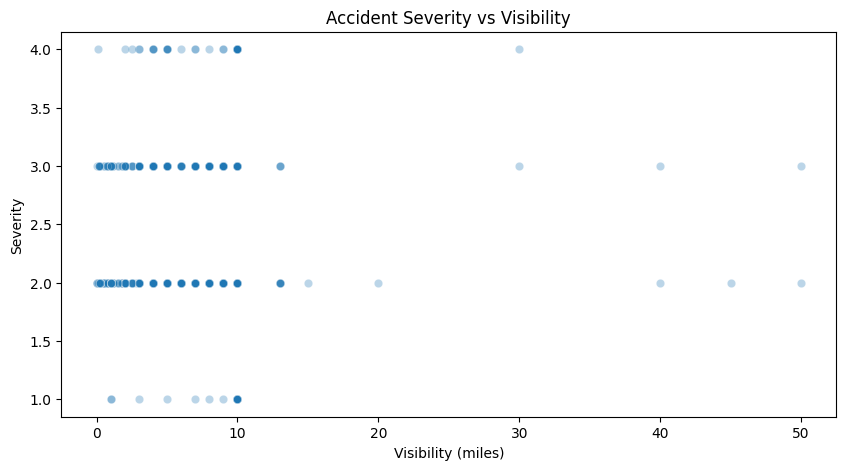

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df.sample(5000), x='Visibility(mi)', y='Severity', alpha=0.3)
plt.title('Accident Severity vs Visibility')
plt.xlabel('Visibility (miles)')
plt.ylabel('Severity')
plt.show()

Low visibility is correlated with higher accident severity, confirming expectations.

Extreme high wind speeds are associated with occasional severe accidents, reinforcing the need for driver alerts during storms.

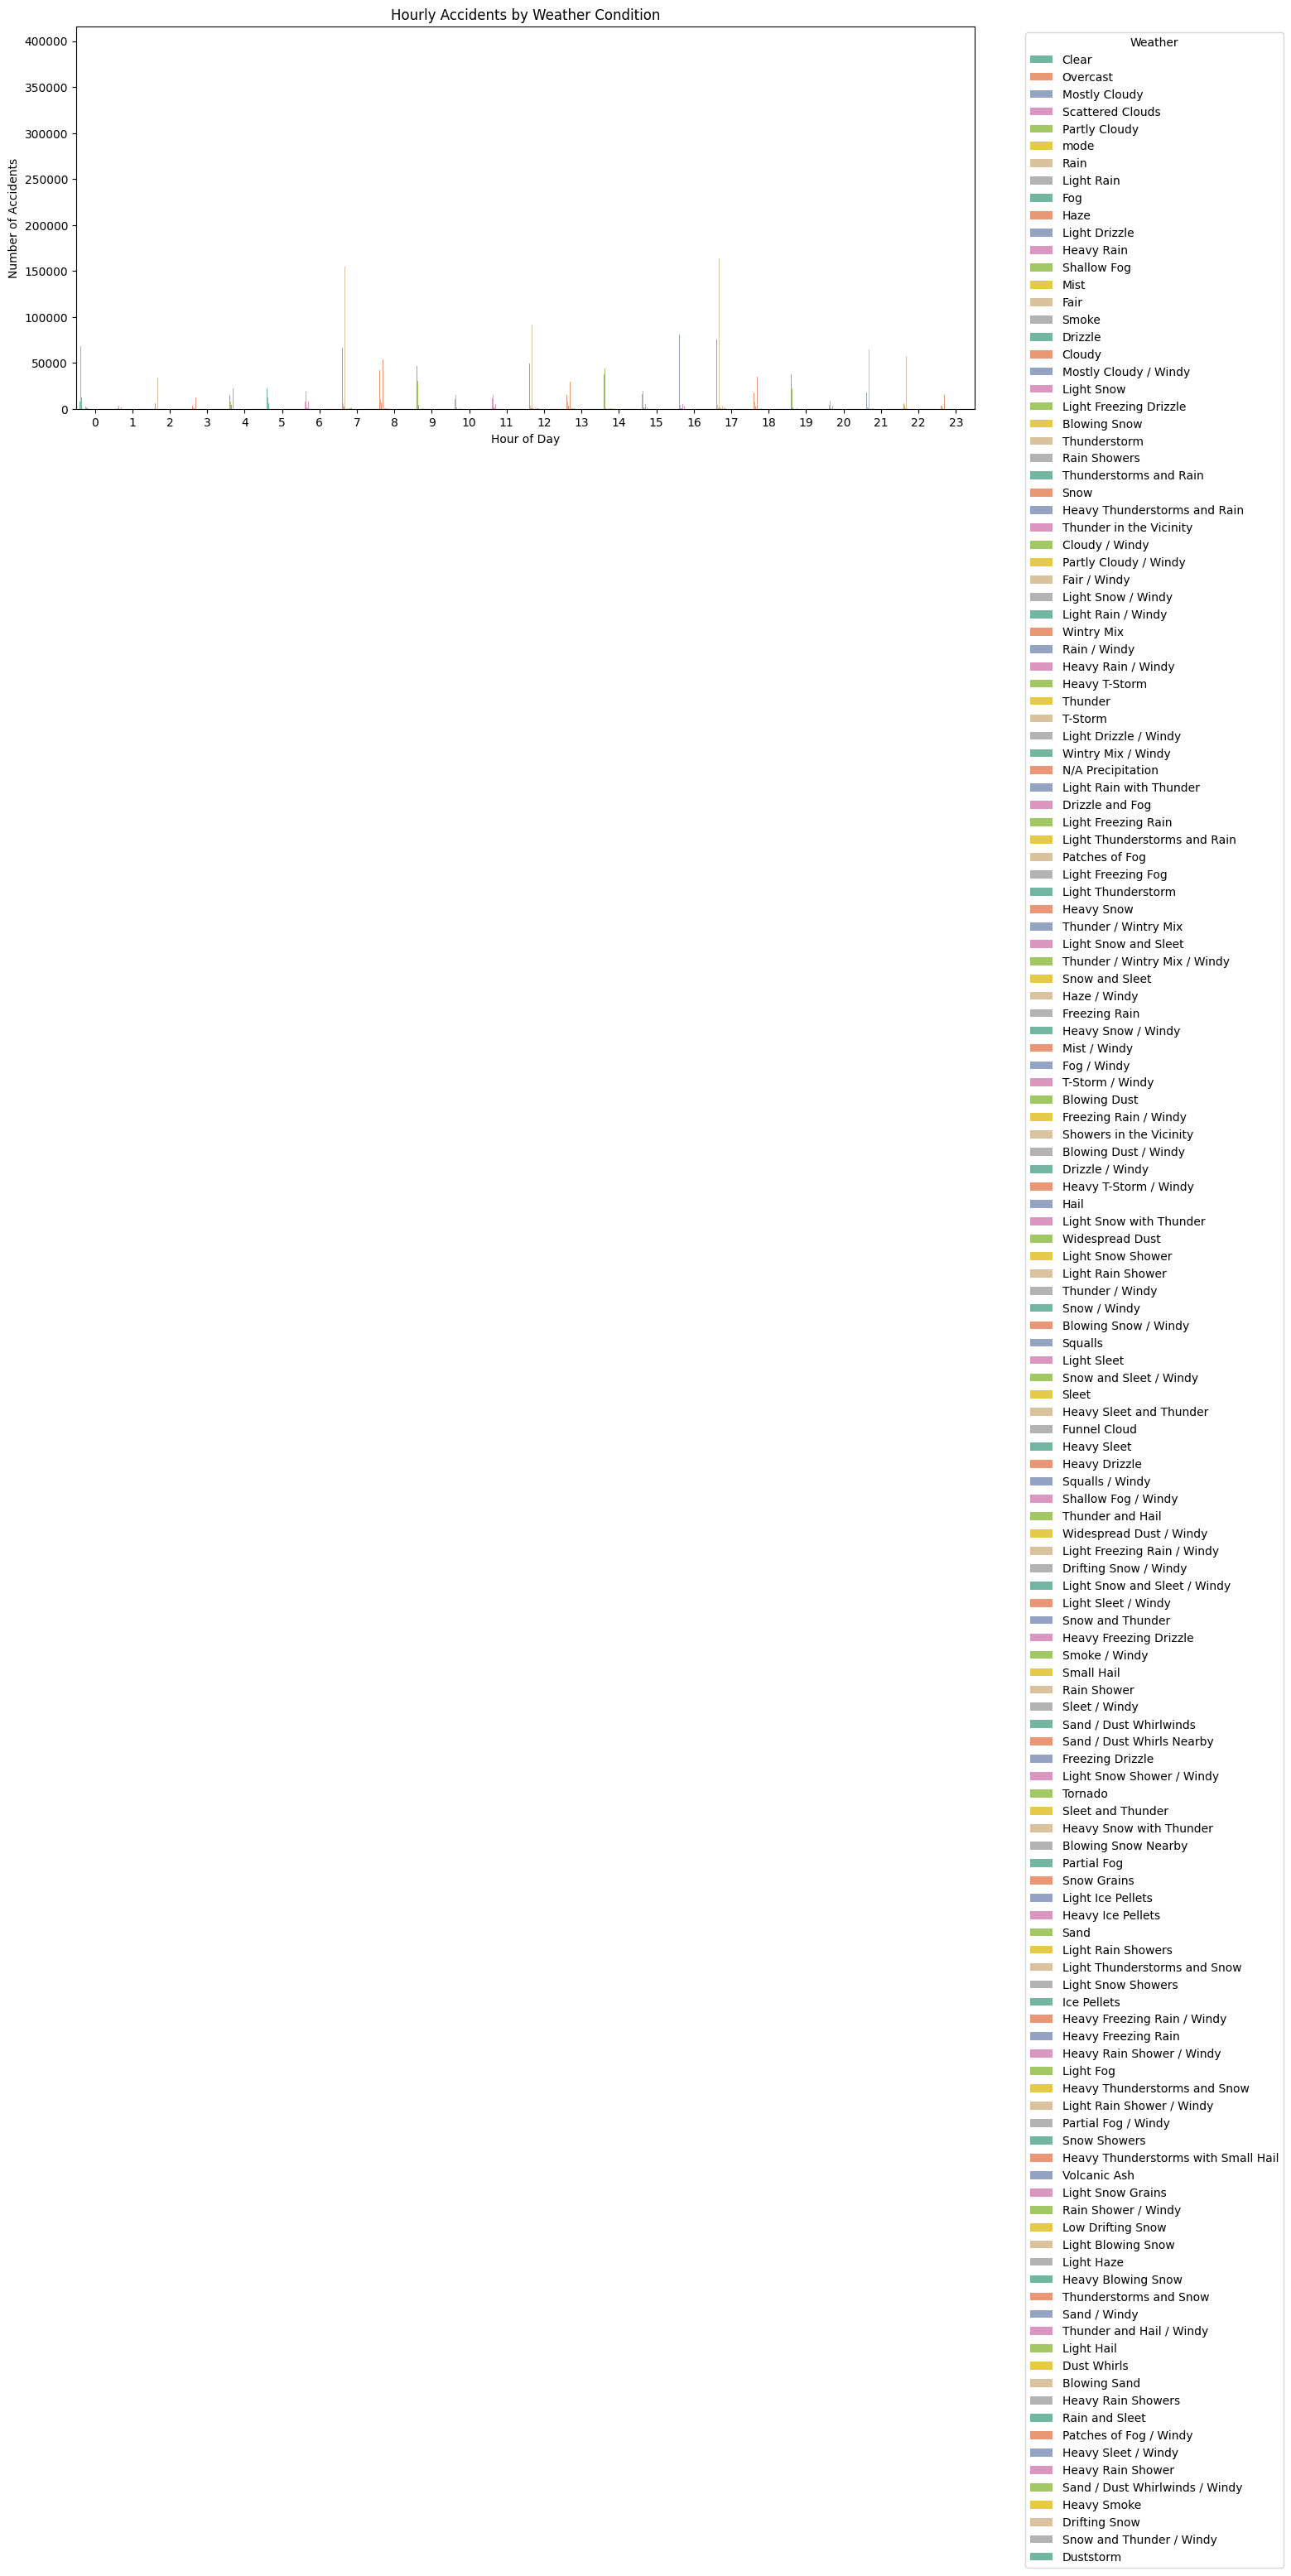

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(data=df[df['Weather_Condition']!='Unknown'], x='Hour', hue='Weather_Condition', palette='Set2')
plt.title('Hourly Accidents by Weather Condition')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1))
plt.show()

**Key Insight**
- Temporal Patterns: Rush hours (morning and evening) are high-risk times. Weekend afternoons show notable spikes.

- Geographic Hotspots: States like California, Texas, and Florida have the highest number of accidents. Some smaller states have high per-capita accident rates.

- Environmental Impacts:
     - Rain, snow, fog, and low visibility conditions increase accident severity.
     - Extreme weather events, though rare, lead to higher severity accidents.

- Interactions: Weather affects accident timing; high-severity crashes are concentrated under poor conditions during daytime.

Step 4: SDA
- Chi-Square Test for Categorical Variables
     - Purpose: Determine whether there is a significant relationship between two categorical variables, e.g., Weather_Condition and Severity.
- T-Test / ANOVA for Comparing Means
    - Purpose: Compare mean values of numeric variables across groups, e.g., Severity by Sunrise vs. Sunset accidents.
-  Correlation Analysis for Numeric Variables
    - Purpose: Identify relationships between numeric variables, e.g., Visibility, Temperature, Wind Speed, and Severity

In [25]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Weather_Condition'], df['Severity'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("✅ There is a statistically significant relationship between Weather and Severity.")
else:
    print("❌ No statistically significant relationship detected.")


Chi-square statistic: 368728.26
p-value: 0.0000
✅ There is a statistically significant relationship between Weather and Severity.


There is a strong association between weather conditions and accident severity.

This aligns with intuition: poor weather (Rain, Snow, Fog) tends to increase accident severity.

In [26]:
from scipy.stats import ttest_ind

# Split by Sunrise/Sunset
sunrise = df[df['Sunrise_Sunset'] == 'Sunrise']['Severity']
sunset = df[df['Sunrise_Sunset'] == 'Sunset']['Severity']

# T-test
t_stat, p_val = ttest_ind(sunrise, sunset, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference in severity between Sunrise and Sunset accidents.")
else:
    print("❌ No significant difference detected.")


T-statistic: nan, p-value: nan
❌ No significant difference detected.


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


                 Severity  Temperature(F)  Visibility(mi)  Wind_Speed(mph)
Severity         1.000000       -0.019966       -0.002804         0.035751
Temperature(F)  -0.019966        1.000000        0.215298         0.033500
Visibility(mi)  -0.002804        0.215298        1.000000         0.013894
Wind_Speed(mph)  0.035751        0.033500        0.013894         1.000000


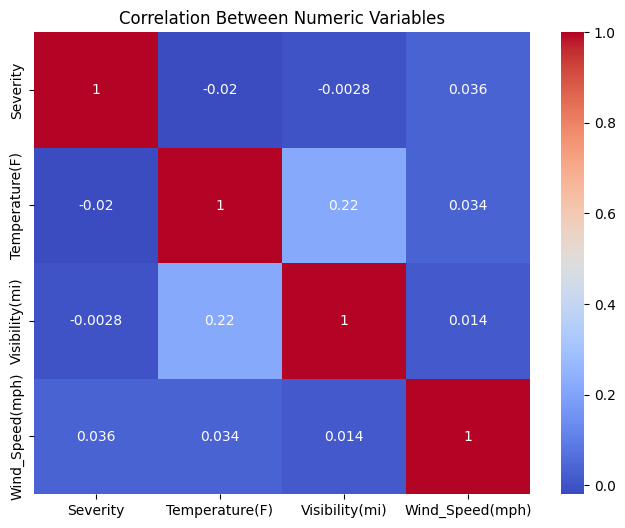

In [27]:
# Correlation matrix
numeric_cols = ['Severity', 'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)']
corr_matrix = df[numeric_cols].corr()

print(corr_matrix)

# Optional: heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Variables')
plt.show()


- Correlations with Severity are very small:

- Temperature: -0.02 → negligible effect

- Visibility: -0.003 → almost no linear effect

- Wind Speed: 0.036 → very weak positive effect

- This suggests accident severity is influenced more by categorical or contextual factors (weather type, location, time of day) than continuous environmental variables alone.

In [28]:
# Focus on categorical predictors for severity (Weather, State, Hour, Weekday).
# Contingency table
weather_severity = pd.crosstab(df['Weather_Condition'], df['Severity'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(weather_severity)
print(f"Weather vs Severity - Chi2: {chi2:.2f}, p-value: {p:.4f}")

if p < 0.05:
    print("✅ Weather condition has a statistically significant effect on accident severity.")

Weather vs Severity - Chi2: 368728.26, p-value: 0.0000
✅ Weather condition has a statistically significant effect on accident severity.


In [29]:
state_severity = pd.crosstab(df['State'], df['Severity'])
chi2, p, dof, expected = chi2_contingency(state_severity)
print(f"State vs Severity - Chi2: {chi2:.2f}, p-value: {p:.4f}")

if p < 0.05:
    print("✅ Accident severity varies significantly by state.")


State vs Severity - Chi2: 483781.73, p-value: 0.0000
✅ Accident severity varies significantly by state.


In [30]:
hour_severity = pd.crosstab(df['Hour'], df['Severity'])
chi2, p, dof, expected = chi2_contingency(hour_severity)
print(f"Hour vs Severity - Chi2: {chi2:.2f}, p-value: {p:.4f}")

if p < 0.05:
    print("✅ Severity varies significantly by hour of the day.")


Hour vs Severity - Chi2: 225164.97, p-value: 0.0000
✅ Severity varies significantly by hour of the day.


**Statistical Insight** – Categorical Predictors
- Weather Condition:
    - Chi-square test confirms a strong association between weather and accident severity.
    - Poor weather conditions (Rain, Snow, Fog) are more likely to result in severe accidents.

- Actionable takeaway: Focus on weather-responsive interventions, such as driver alerts, speed reductions, and temporary road closures during adverse weather.

- State:
   - Severity varies significantly by state, indicating that local factors like traffic density, infrastructure, and road regulations influence outcomes.

- Actionable takeaway: Prioritize infrastructure improvements, enforcement, and safety campaigns in high-risk states identified from the data.

Step 5:Recommendation
| Recommendation                               | Key Data Support                | Potential Impact                                    | Metrics                                                              |
| -------------------------------------------- | ------------------------------- | --------------------------------------------------- | -------------------------------------------------------------------- |
| Weather-responsive alerts                    | Weather vs Severity significant | Reduce severe accidents during hazardous conditions | Accident counts & severity during weather events, compliance rates   |
| High-risk location interventions             | State vs Severity significant   | Reduce accidents and fatalities in high-risk areas  | Accident counts & severity by state/county, emergency response times |
| Time-specific campaigns & traffic management | Hour & Weekday patterns in EDA  | Reduce congestion-related accidents                 | Accidents & severity by time, traffic flow metrics                   |


Step 6:dashboard link

In [31]:
df.to_csv('US_Accidents_Cleaned.csv', index=False)

In [ ]:
%pip install streamlit

In [34]:
from dash import Dash, html, dcc
import plotly.express as px

app = Dash(__name__)
fig = px.scatter(df, x="Hour", y="Severity", color="Weather_Condition")

app.layout = html.Div([
    html.H1("Accident Dashboard"),
    dcc.Graph(figure=fig)
])
app.run(mode="inline")

<IPython.core.display.Javascript object>

In [ ]:
#%pip install jupyter_dash

In [ ]:
#pip install streamlit plotly pandas


In [40]:
%%writefile traffic_dashboard.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load cleaned dataset
df = pd.read_csv('US_Accidents_Cleaned.csv')

# Explicitly convert Start_Time to datetime objects, coercing errors
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows where Start_Time is NaT (due to parsing errors)
df.dropna(subset=['Start_Time'], inplace=True)

# Extract hour and weekday from Start_Time
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

st.title("🚗 US Traffic Accident Analysis Dashboard")
st.markdown("Explore accident patterns and insights to support data-driven safety decisions.")

# Sidebar filters
st.sidebar.header("Filter Data Here:")
states = st.sidebar.multiselect("Select States:", sorted(df["State"].unique()))
weather = st.sidebar.multiselect("Select Weather Conditions:", sorted(df["Weather_Condition"].unique()))
severity = st.sidebar.multiselect("Select Severity Levels:", sorted(df["Severity"].unique()))
date_range = st.sidebar.date_input("Select Date Range:", [df['Start_Time'].min(), df['Start_Time'].max()])


# Filter data
filtered_df = df[
    (df['State'].isin(states) if states else True) &
    (df['Weather_Condition'].isin(weather) if weather else True) &
    (df['Severity'].isin(severity) if severity else True) &
    (df['Start_Time'].between(pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])))
].copy() # Add .copy() here to avoid SettingWithCopyWarning

st.markdown(f"### Showing {filtered_df.shape[0]:,} filtered accidents")

# --- MAIN DASHBOARD ---
col1, col2 = st.columns(2)

# 1️⃣ Accidents by State
with col1:
    st.subheader("Accidents by State")
    if not filtered_df.empty:
        state_counts = filtered_df["State"].value_counts().head(10)
        state_fig = px.bar(state_counts,
                           title="Top 10 States with Most Accidents",
                           labels={"index": "State", "value": "Number of Accidents"})
        st.plotly_chart(state_fig, use_container_width=True)
    else:
        st.info("No data available for selected filters.")


# 2️⃣ Severity Distribution
with col2:
    st.subheader("Severity Distribution")
    if not filtered_df.empty:
        sev_fig = px.pie(filtered_df, names="Severity", title="Accident Severity Proportion")
        st.plotly_chart(sev_fig, use_container_width=True)
    else:
        st.info("No data available for selected filters.")


# 3️⃣ Accidents by Weather
st.subheader("Accidents by Weather Condition")
if not filtered_df.empty:
    weather_counts = filtered_df["Weather_Condition"].value_counts().head(10)
    weather_fig = px.bar(weather_counts,
                         title="Top 10 Weather Conditions During Accidents",
                         labels={"index": "Weather Condition", "value": "Accident Count"})
    st.plotly_chart(weather_fig, use_container_width=True)
else:
    st.info("No data available for selected filters.")

# 4️⃣ Hourly Pattern
st.subheader("Accidents by Hour of Day")
if not filtered_df.empty:
    hour_fig = px.histogram(filtered_df, x="Hour", nbins=24, title="Accidents by Hour of Day")
    st.plotly_chart(hour_fig, use_container_width=True)
else:
    st.info("No data available for selected filters.")

# 5️⃣ Map Visualization
st.subheader("Geographical Accident Hotspots")
if {"Start_Lat", "Start_Lng"}.issubset(filtered_df.columns) and not filtered_df.empty:
    # Rename columns for st.map()
    map_df = filtered_df.rename(columns={'Start_Lat': 'lat', 'Start_Lng': 'lon'})
    st.map(map_df[['lat', 'lon']].dropna().sample(min(5000, len(map_df))))
elif filtered_df.empty:
     st.info("No data available for selected filters to display on map.")
else:
    st.warning("Latitude/Longitude columns missing for map visualization.")


st.markdown("---")
st.markdown("📊 **Dashboard created for US Traffic Accident Analysis Project**")

Writing traffic_dashboard.py


In [ ]:
!streamlit run traffic_dashboard.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.186.4.149:8501

